### import libraries

In [1]:
# Import the libraries
import numpy as np                  # Scientific Computing
import pandas as pd                 # Data Analysis
import matplotlib.pyplot as plt     # Plotting
import seaborn as sns               # Statistical Data Visualization
import zipfile
import os

# Let's make sure pandas returns all the rows and columns for the dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Force pandas to display full numbers instead of scientific notation
# pd.options.display.float_format = '{:.0f}'.format

# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### upload data using zip file

In [3]:
zip_path = '/content/drive/MyDrive/bdc_us_fixed_broadband_summary_by_geography_D24_10jun2025.zip'

# Open the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # List all files in the zip
    print(zip_ref.namelist()) #check file name in zip

['bdc_us_fixed_broadband_summary_by_geography_D24_10jun2025.csv']


### change the file name to "fixed_broadband.csv"

In [4]:
extract_dir = '/content/drive/MyDrive'
old_filename = 'bdc_us_fixed_broadband_summary_by_geography_D24_10jun2025.csv'
new_filename = 'fixed_broadband.csv'

# Extract all files
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Full paths
old_path = os.path.join(extract_dir, old_filename)
new_path = os.path.join(extract_dir, new_filename)

# Rename the extracted file
os.rename(old_path, new_path)

### read data and gather information

In [5]:
path = '/content/drive/MyDrive/fixed_broadband.csv'
full = pd.read_csv(path)
full.head()

,area_data_type,geography_type,geography_id,geography_desc,geography_desc_full,total_units,biz_res,technology,speed_02_02,speed_10_1,speed_25_3,speed_100_20,speed_250_25,speed_1000_100
0,Total,National,99,National,National,164620769,R,Any Technology,1.000000,1.000000,1.000000,0.999915,0.913689,0.591365
1,Total,National,99,National,National,164620769,B,Any Technology,1.000000,1.000000,1.000000,0.993139,0.746884,0.501676
2,Total,National,99,National,National,164620769,R,All Wired,0.942141,0.931779,0.918651,0.908110,0.898847,0.583388
3,Total,National,99,National,National,164620769,B,All Wired,0.829826,0.801551,0.775540,0.728392,0.712035,0.484683
4,Total,National,99,National,National,164620769,R,Any Terrestrial,0.978991,0.971951,0.964834,0.945304,0.913689,0.591365


In [6]:
full.tail()

,area_data_type,geography_type,geography_id,geography_desc,geography_desc_full,total_units,biz_res,technology,speed_02_02,speed_10_1,speed_25_3,speed_100_20,speed_250_25,speed_1000_100
623935,Rural,CBSA (MSA),49820,"Zapata, TX","Zapata, TX",2642,B,Unlicensed Fixed Wireless,0.434519,0.434519,0.434519,0.003407,0.002650,0.0
623936,Rural,CBSA (MSA),49820,"Zapata, TX","Zapata, TX",2642,R,Licensed Fixed Wireless,0.478047,0.366768,0.366768,0.149129,0.053369,0.0
623937,Rural,CBSA (MSA),49820,"Zapata, TX","Zapata, TX",2642,B,Licensed Fixed Wireless,0.701741,0.543149,0.540121,0.171461,0.053369,0.0
623938,Rural,CBSA (MSA),49820,"Zapata, TX","Zapata, TX",2642,R,Other,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
623939,Rural,CBSA (MSA),49820,"Zapata, TX","Zapata, TX",2642,B,Other,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [7]:
full.shape

(623940, 14)

In [8]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623940 entries, 0 to 623939
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   area_data_type       623940 non-null  object 
 1   geography_type       623940 non-null  object 
 2   geography_id         623940 non-null  object 
 3   geography_desc       623940 non-null  object 
 4   geography_desc_full  623940 non-null  object 
 5   total_units          623940 non-null  int64  
 6   biz_res              623940 non-null  object 
 7   technology           623940 non-null  object 
 8   speed_02_02          623940 non-null  float64
 9   speed_10_1           623940 non-null  float64
 10  speed_25_3           623940 non-null  float64
 11  speed_100_20         623940 non-null  float64
 12  speed_250_25         623940 non-null  float64
 13  speed_1000_100       623940 non-null  float64
dtypes: float64(6), int64(1), object(7)
memory usage: 66.6+ MB


``` based on the information above, no missing values for all columns ```

In [9]:
full.describe()

,total_units,speed_02_02,speed_10_1,speed_25_3,speed_100_20,speed_250_25,speed_1000_100
count,6.239400e+05,623940.000000,623940.000000,623940.000000,623940.000000,623940.000000,623940.000000
mean,1.174466e+05,0.682724,0.650933,0.630012,0.507730,0.299657,0.180103
std,1.894663e+06,0.378161,0.384968,0.395467,0.421444,0.381699,0.291874
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.332000e+03,0.386914,0.303987,0.229282,0.000945,0.000000,0.000000
50%,1.320900e+04,0.886152,0.835642,0.806306,0.527915,0.000167,0.000000
75%,4.262800e+04,1.000000,1.000000,1.000000,0.985898,0.673684,0.305059
max,1.646208e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### check information in specific columns

In [19]:
full['geography_type'].value_counts()

,count
geography_type,
County,366510
CBSA (MSA),118590
Tribal,74520
Congressional District,56280
State,7890
National,150


# Research Question: How do states vary in broadband access at the minimum (25/3 Mbps) versus gigabit (1000/100 Mbps) tiers?

### extract data by state

In [20]:
state = full[full['geography_type'] == 'State']
state.head()

,area_data_type,geography_type,geography_id,geography_desc,geography_desc_full,total_units,biz_res,technology,speed_02_02,speed_10_1,speed_25_3,speed_100_20,speed_250_25,speed_1000_100
23370,Total,State,01,Alabama,Alabama,2748899,R,Any Technology,1.000000,1.000000,1.000000,0.999987,0.845864,0.512082
23371,Total,State,01,Alabama,Alabama,2748899,B,Any Technology,1.000000,1.000000,1.000000,0.999984,0.686800,0.506873
23372,Total,State,01,Alabama,Alabama,2748899,R,All Wired,0.911723,0.893990,0.871050,0.852828,0.845445,0.511956
23373,Total,State,01,Alabama,Alabama,2748899,B,All Wired,0.833867,0.790462,0.750395,0.699831,0.686514,0.506747
23374,Total,State,01,Alabama,Alabama,2748899,R,Any Terrestrial,0.939551,0.918083,0.902366,0.873608,0.845864,0.512082


In [21]:
state.shape, state.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7890 entries, 23370 to 486989
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   area_data_type       7890 non-null   object 
 1   geography_type       7890 non-null   object 
 2   geography_id         7890 non-null   object 
 3   geography_desc       7890 non-null   object 
 4   geography_desc_full  7890 non-null   object 
 5   total_units          7890 non-null   int64  
 6   biz_res              7890 non-null   object 
 7   technology           7890 non-null   object 
 8   speed_02_02          7890 non-null   float64
 9   speed_10_1           7890 non-null   float64
 10  speed_25_3           7890 non-null   float64
 11  speed_100_20         7890 non-null   float64
 12  speed_250_25         7890 non-null   float64
 13  speed_1000_100       7890 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 924.6+ KB


((7890, 14), None)

In [22]:
state['geography_desc'].value_counts()

,count
geography_desc,
Alabama,150
Alaska,150
Arizona,150
California,150
Connecticut,150
Colorado,150
Delaware,150
Florida,150
Minnesota,150


### Combine states by regions and create an additional column called 'region'

In [23]:
regions = [
  state['geography_desc'].isin(['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New York', 'New Jersey', 'Pennsylvania']),
  state['geography_desc'].isin(['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota']),
  state['geography_desc'].isin(['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'Washington, D.C.', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']),
  state['geography_desc'].isin(['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington'])
]

region_names = ['Northeast', 'Midwest', 'South', 'West']

region = np.select(regions, region_names, default = 'Other')

region_insert = state.columns.get_loc('geography_desc') + 1
state.insert(region_insert, 'region', region)

In [24]:
state['region'].value_counts()

,count
region,
South,2280
West,1950
Midwest,1710
Northeast,1260
Other,690


### Visualization for research question 1

In [25]:
tier_region = state[['region', 'speed_25_3', 'speed_1000_100']]
tier_region.shape

(7890, 3)

In [26]:
tier_region.describe()

,speed_25_3,speed_1000_100
count,7890.000000,7890.000000
mean,0.666196,0.195832
std,0.361364,0.265050
min,0.000000,0.000000
25%,0.374959,0.000000
50%,0.814296,0.004465
75%,0.999723,0.408875
max,1.000000,1.000000


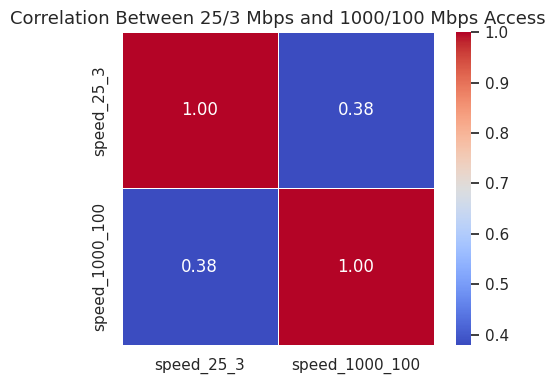

In [29]:
tier_corr = tier_region[['speed_25_3', 'speed_1000_100']].corr()

plt.figure(figsize=(5, 4))
sns.heatmap(tier_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Between 25/3 Mbps and 1000/100 Mbps Access', fontsize=13)
plt.tight_layout()
plt.show()

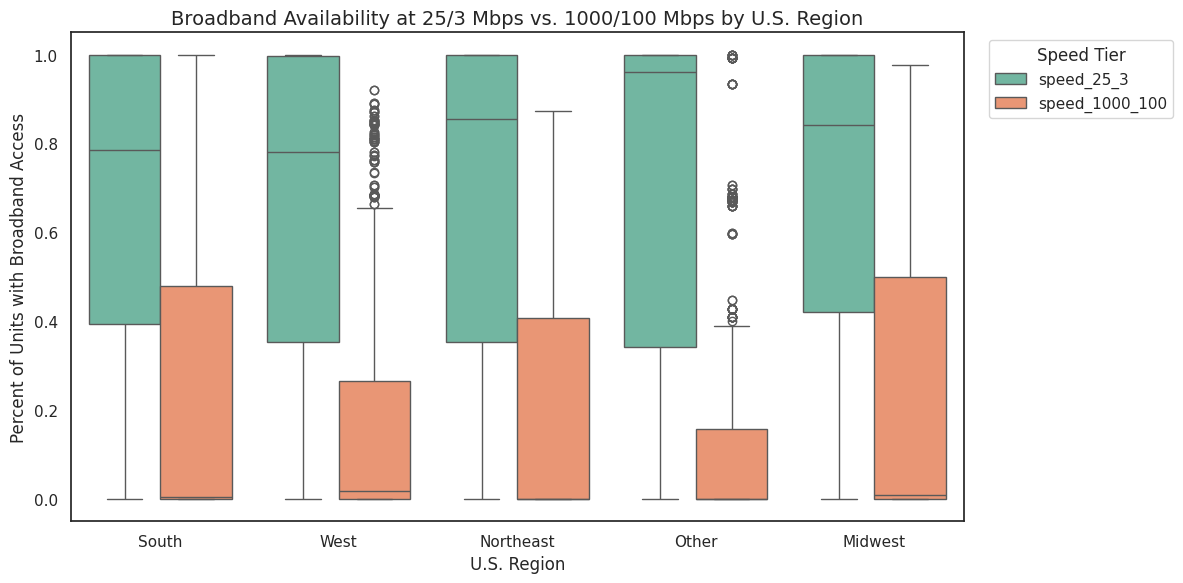

In [30]:
# Melt the dataframe
tier_region_melted = tier_region.melt(
    id_vars='region',
    value_vars=['speed_25_3', 'speed_1000_100'],
    var_name='Speed_Tier',
    value_name='Availability'
)

# Set seaborn themes
sns.set_theme(style='white')

# Create the plot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(
    data=tier_region_melted,
    x='region',
    y='Availability',
    hue='Speed_Tier',
    palette='Set2'
)

# Add titles and labels
plt.title('Broadband Availability at 25/3 Mbps vs. 1000/100 Mbps by U.S. Region', fontsize=14)
plt.xlabel('U.S. Region')
plt.ylabel('Percent of Units with Broadband Access')

# Move the legend
plt.legend(title='Speed Tier', loc='upper left', bbox_to_anchor=(1.02, 1))

# Final layout adjustments
plt.tight_layout()
plt.show()

# Research Question 2: How does access to high-speed broadband (≥100/20 Mbps) vary across different U.S. regions (Northeast, Midwest, South, West)?

In [35]:
tier_region_high = state[['region', 'speed_100_20']]

tier_region_high.describe()

,speed_100_20
count,7890.000000
mean,0.532789
std,0.398893
min,0.000000
25%,0.074329
50%,0.576876
75%,0.958412
max,1.000000


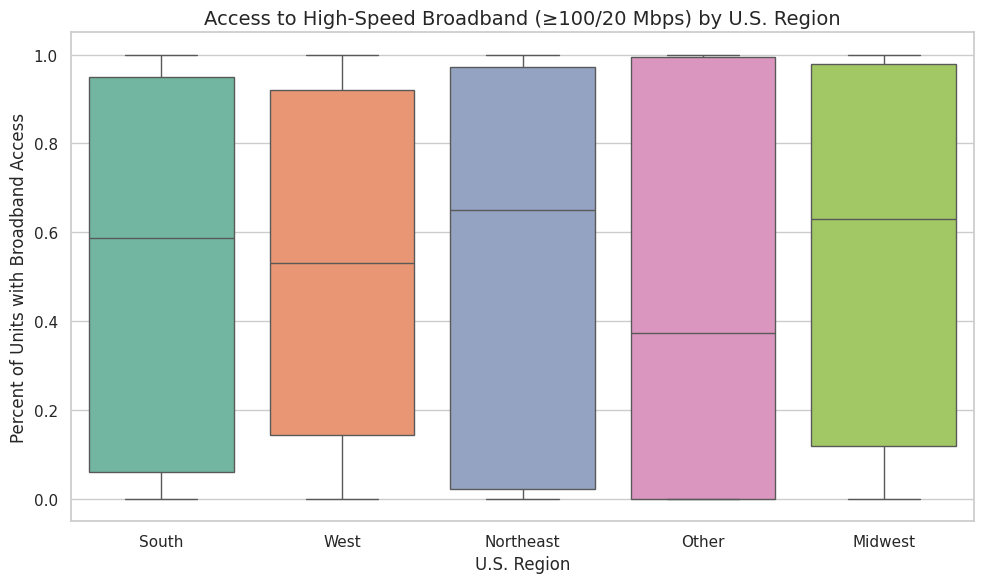

In [36]:
# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=tier_region_high, x='region', y='speed_100_20', palette='Set2')

# Labels and title
plt.title('Access to High-Speed Broadband (≥100/20 Mbps) by U.S. Region', fontsize=14)
plt.xlabel('U.S. Region')
plt.ylabel('Percent of Units with Broadband Access')

# Tight layout and show
plt.tight_layout()
plt.show()

# Research Question 3: How does fiber broadband availability vary between rural and urban areas across different states?

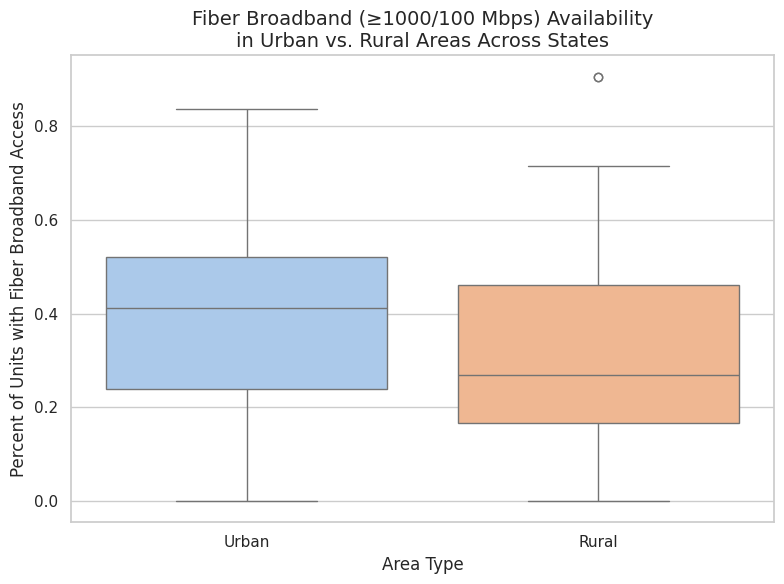

In [37]:
# Step 1: Filter to only fiber entries at the state level
fiber = state[
    (state['technology'] == 'Fiber') &
    (state['geography_type'] == 'State') &
    (state['area_data_type'].isin(['Urban', 'Rural']))
]

# Step 2: Drop missing values in speed column (if any)
fiber = fiber.dropna(subset=['speed_1000_100'])

sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=fiber, x='area_data_type', y='speed_1000_100', palette='pastel')

# Labels and title
plt.title('Fiber Broadband (≥1000/100 Mbps) Availability\nin Urban vs. Rural Areas Across States', fontsize=14)
plt.xlabel('Area Type')
plt.ylabel('Percent of Units with Fiber Broadband Access')

plt.tight_layout()
plt.show()


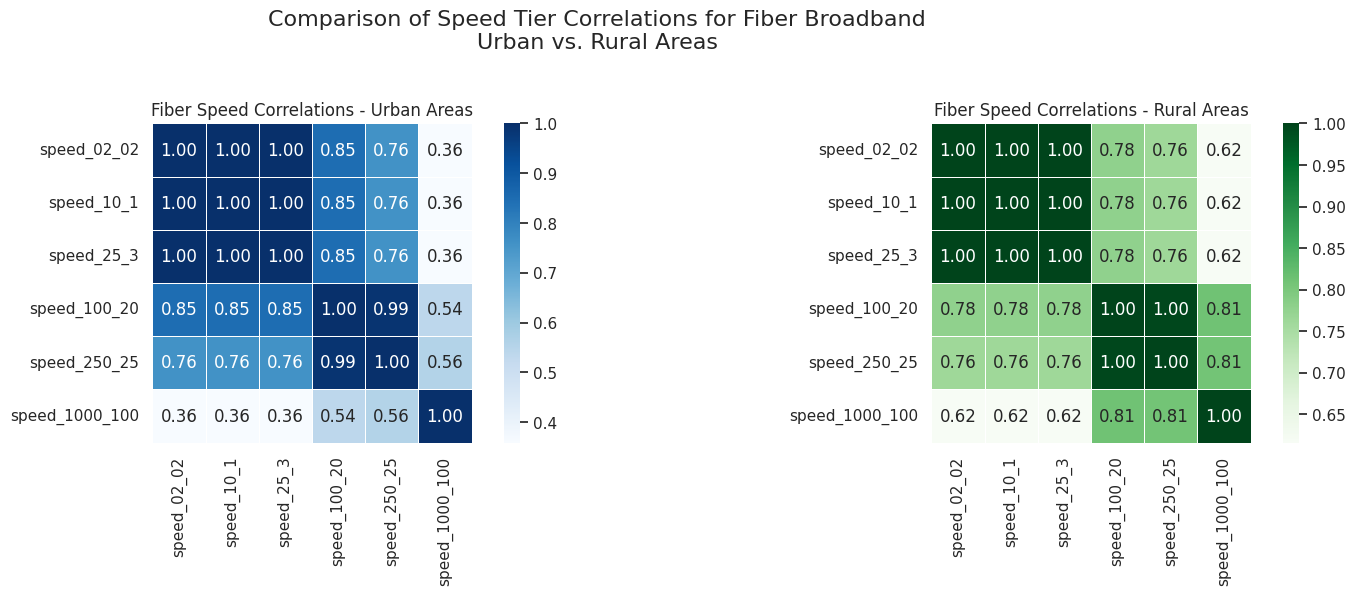

In [38]:
# Step 1: Filter to only fiber technology
fiber = state[state['technology'] == 'Fiber']

# Step 2: Create two separate DataFrames for urban and rural
fiber_urban = fiber[fiber['area_data_type'] == 'Urban']
fiber_rural = fiber[fiber['area_data_type'] == 'Rural']

# Step 3: Choose only the speed tier columns
speed_cols = ['speed_02_02', 'speed_10_1', 'speed_25_3', 'speed_100_20', 'speed_250_25', 'speed_1000_100']
corr_urban = fiber_urban[speed_cols].corr()
corr_rural = fiber_rural[speed_cols].corr()

# Step 4: Plot side-by-side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(corr_urban, annot=True, cmap='Blues', fmt=".2f", square=True, linewidths=0.5, ax=axes[0])
axes[0].set_title('Fiber Speed Correlations - Urban Areas')

sns.heatmap(corr_rural, annot=True, cmap='Greens', fmt=".2f", square=True, linewidths=0.5, ax=axes[1])
axes[1].set_title('Fiber Speed Correlations - Rural Areas')

plt.suptitle('Comparison of Speed Tier Correlations for Fiber Broadband\nUrban vs. Rural Areas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for suptitle
plt.show()


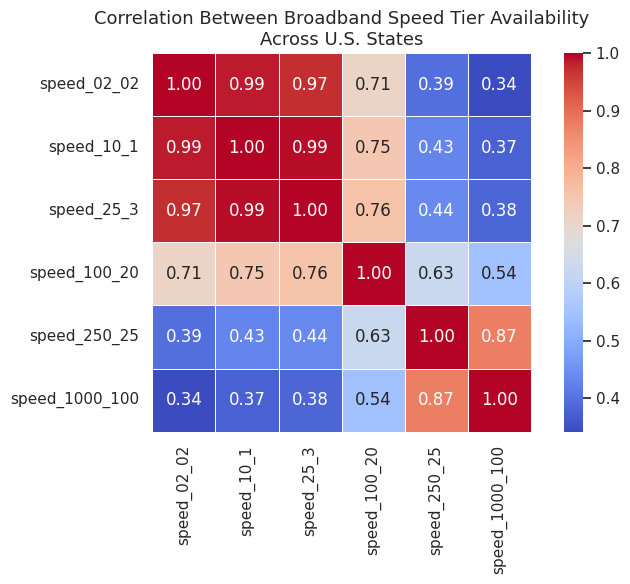

In [39]:
# Step 1: Select only the speed columns
speed_cols = ['speed_02_02', 'speed_10_1', 'speed_25_3', 'speed_100_20', 'speed_250_25', 'speed_1000_100']
corr_data = state[speed_cols]

# Step 2: Compute correlation matrix
corr_matrix = corr_data.corr()

# Step 3: Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)

# Title
plt.title('Correlation Between Broadband Speed Tier Availability\nAcross U.S. States', fontsize=13)
plt.tight_layout()
plt.show()


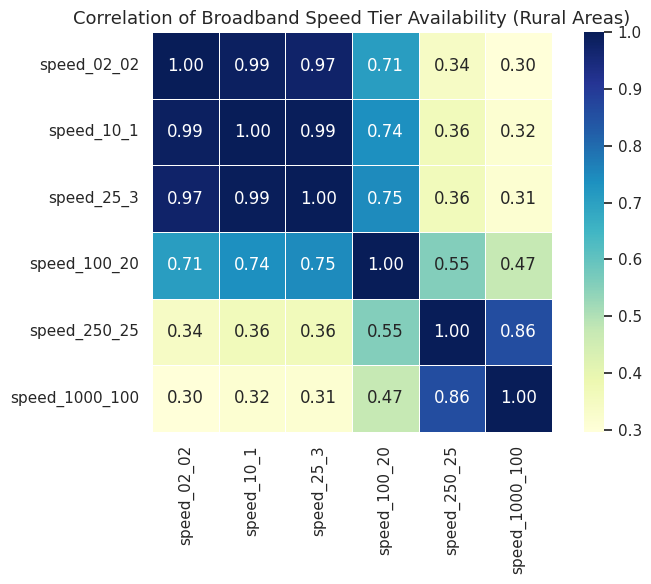

In [40]:
# Filter for rural areas only
rural = state[state['area_data_type'] == 'Rural']

# Select only speed tier columns
speed_cols = ['speed_02_02', 'speed_10_1', 'speed_25_3', 'speed_100_20', 'speed_250_25', 'speed_1000_100']
corr_matrix_rural = rural[speed_cols].corr()

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_rural, annot=True, cmap='YlGnBu', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation of Broadband Speed Tier Availability (Rural Areas)', fontsize=13)
plt.tight_layout()
plt.show()

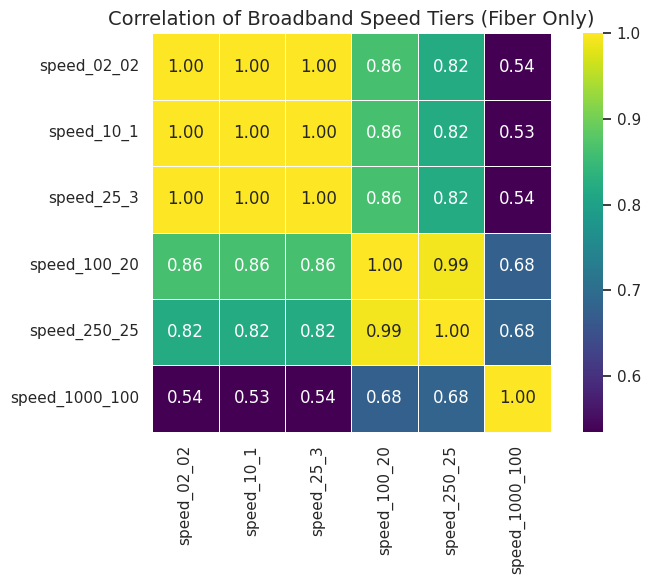

In [41]:
# Step 1: Filter for only Fiber technology
fiber_only = state[state['technology'] == 'Fiber']

# Step 2: Select only speed-related columns
speed_cols = ['speed_02_02', 'speed_10_1', 'speed_25_3', 'speed_100_20', 'speed_250_25', 'speed_1000_100']
fiber_corr = fiber_only[speed_cols].corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(fiber_corr, annot=True, cmap='viridis', fmt=".2f", square=True, linewidths=0.5)

# Title
plt.title('Correlation of Broadband Speed Tiers (Fiber Only)', fontsize=14)
plt.tight_layout()
plt.show()